In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [6]:
MLP_model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(500, activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = 'he_uniform')
])

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
MLP_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
MLP_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 573,910 (2.19 MB)

 Trainable params: 573,910 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
mlphistory= MLP_model.fit(x_train, y_train, epochs=20, batch_size = 512,validation_data=(x_test,y_test))

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6068 - loss: 1.1156 - val_accuracy: 0.8280 - val_loss: 0.4822
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8156 - loss: 0.5193 - val_accuracy: 0.8494 - val_loss: 0.4164
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8367 - loss: 0.4523 - val_accuracy: 0.8488 - val_loss: 0.4135
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8471 - loss: 0.4194 - val_accuracy: 0.8579 - val_loss: 0.3850
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8550 - loss: 0.3985 - val_accuracy: 0.8653 - val_loss: 0.3689
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8605 - loss: 0.3833 - val_accuracy: 0.8682 - val_loss: 0.3599
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8633 - loss: 0.3729 - val_accuracy: 0.8708 - val_loss: 0.3579
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8647 - loss: 0.3644 - val_accu

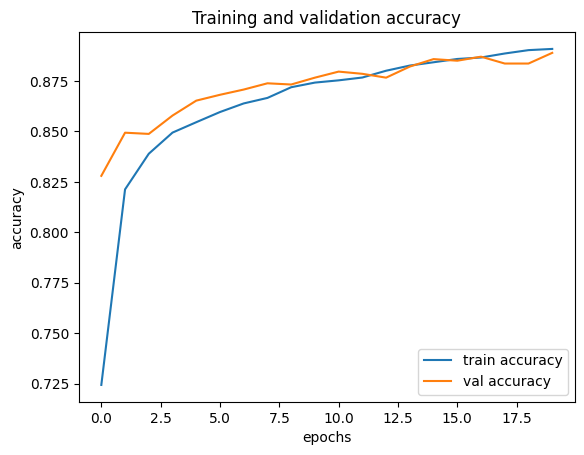

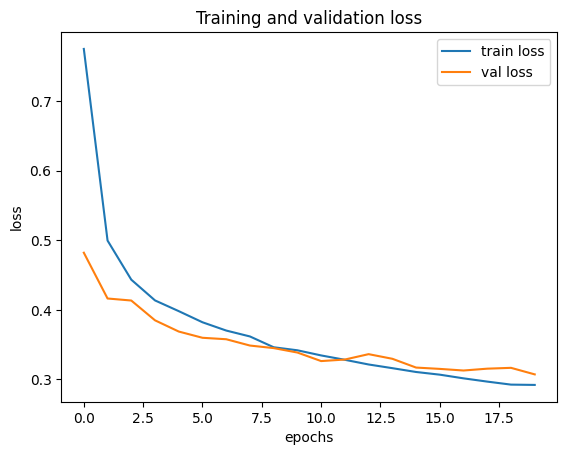

In [10]:
acc= mlphistory.history['accuracy']
val_acc=mlphistory.history['val_accuracy']
loss=mlphistory.history['loss']
val_loss=mlphistory.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [11]:
(loss_mlp,accuracy_mlp)=MLP_model.evaluate(x_test,y_test,batch_size=256,verbose=1)
print(accuracy_mlp*100)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8870 - loss: 0.3074
88.89999985694885


In [12]:
mlp_predict=MLP_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


In [13]:
mlp_predicted_labels = np.argmax(mlp_predict, axis=1)

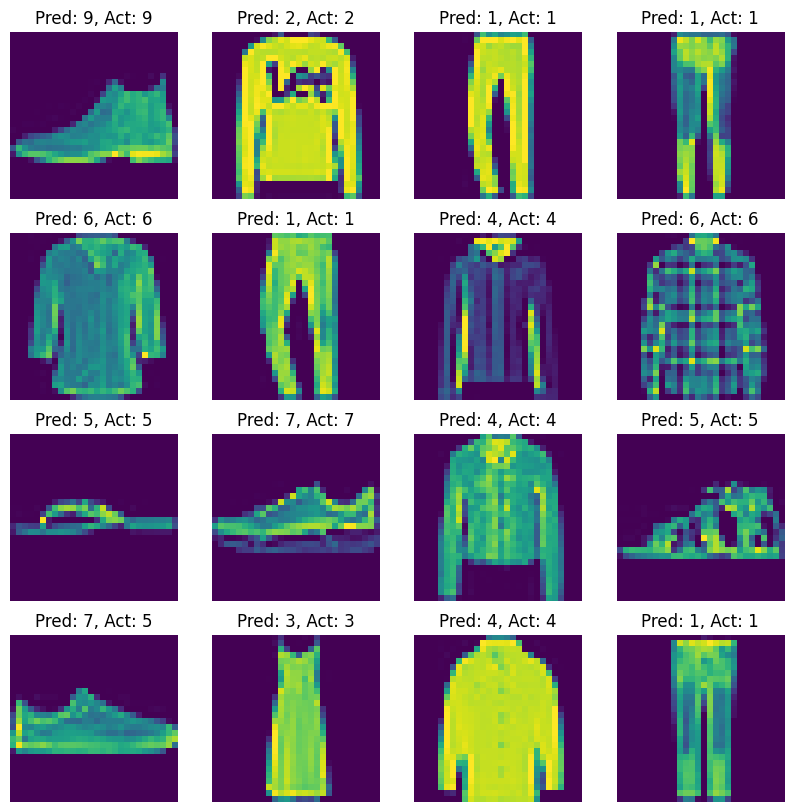

In [14]:
plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'Pred: {y_test[i]}, Act: {mlp_predicted_labels[i]}')
    plt.axis("off")

In [15]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [16]:
cnn_model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    data_augmentation,
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(50, (3, 3), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = 'he_uniform')
       
])

In [17]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 50)     │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 13, 13, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 100)    │        45,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 100)    │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 5, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 300)            │       750,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 827,610 (3.16 MB)

 Trainable params: 827,310 (3.16 MB)

 Non-trainable params: 300 (1.17 KB)

In [18]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
print(x_train.shape)

(60000, 28, 28, 1)


In [20]:
cnn_history= cnn_model.fit(x_train, y_train, epochs=40, batch_size = 512,validation_data=(x_test,y_test))

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 32s 261ms/step - accuracy: 0.3909 - loss: 1.9081 - val_accuracy: 0.3601 - val_loss: 2.1790
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 33s 280ms/step - accuracy: 0.6501 - loss: 0.9423 - val_accuracy: 0.4332 - val_loss: 1.7175
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 325ms/step - accuracy: 0.6937 - loss: 0.8176 - val_accuracy: 0.5781 - val_loss: 1.1705
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 40s 341ms/step - accuracy: 0.7188 - loss: 0.7464 - val_accuracy: 0.6984 - val_loss: 0.8127
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 36s 308ms/step - accuracy: 0.7379 - loss: 0.6999 - val_accuracy: 0.7633 - val_loss: 0.6234
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 38s 325ms/step - accuracy: 0.7529 - loss: 0.6580 - val_accuracy: 0.7825 - val_loss: 0.5738
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 37s 311ms/step - accuracy: 0.7626 - loss: 0.6357 - val_accuracy: 0.7869 - val_loss: 0.5672
Epoch 8/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 45s 384ms/step - accuracy: 0.7743 - loss: 0

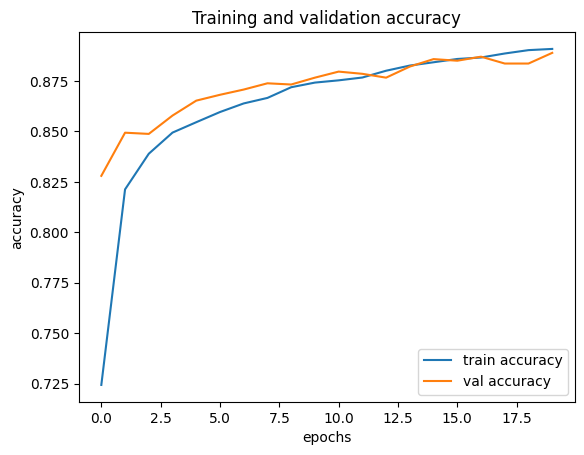

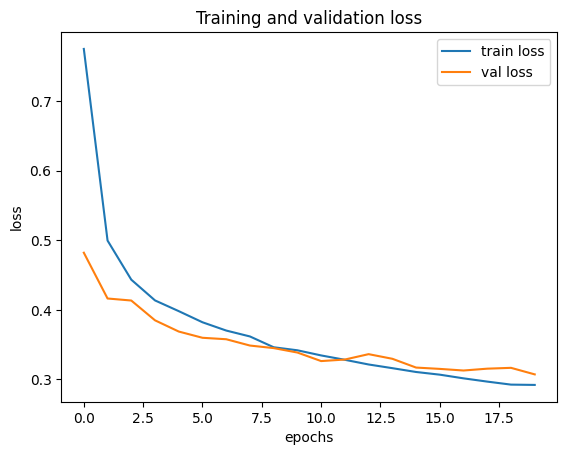

In [26]:
acc= mlphistory.history['accuracy']
val_acc=mlphistory.history['val_accuracy']
loss=mlphistory.history['loss']
val_loss=mlphistory.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [27]:
(loss_cnn,accuracy_cnn)=cnn_model.evaluate(x_test,y_test,batch_size=256,verbose=1)
print(accuracy_cnn*100)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.8218 - loss: 0.5162
81.97000026702881


In [28]:
cnn_predict=cnn_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [29]:
cnn_predicted_labels = np.argmax(cnn_predict, axis=1)

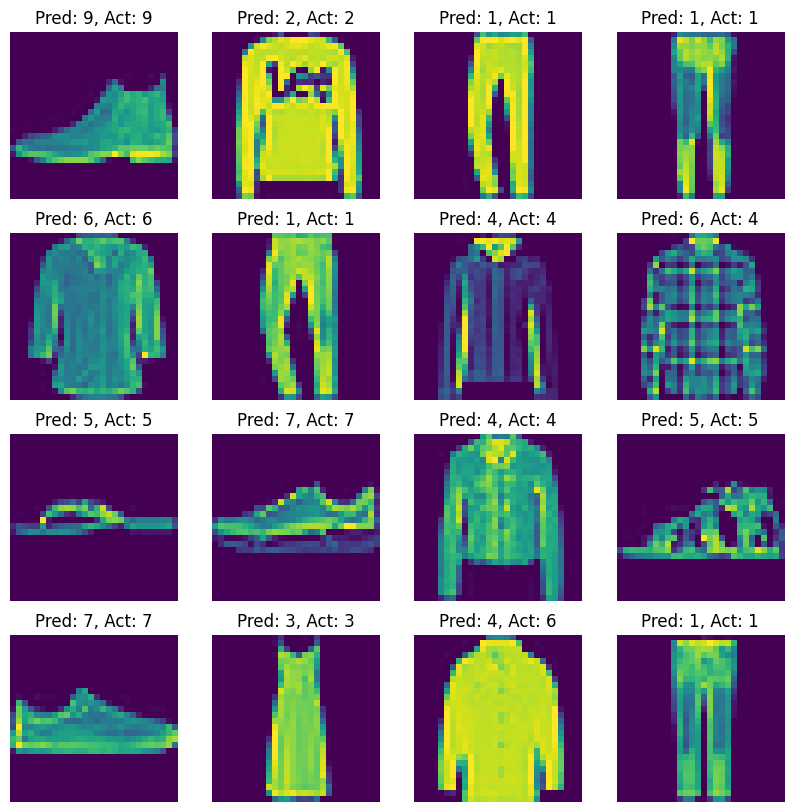

In [25]:
plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'Pred: {y_test[i]}, Act: {cnn_predicted_labels[i]}')
    plt.axis("off")

In [30]:
print(f'CNN accuracy is {accuracy_cnn} and MLP accuracy is {accuracy_mlp}')

CNN accuracy is 0.8197000026702881 and MLP accuracy is 0.8889999985694885
